# Apply logistic regression to categorize whether a county had high mortality rate due to contamination

## 1. Import the necessary packages to read in the data, plot, and create a logistic regression model

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression

## 2. Read in the hanford.csv file in the `data/` folder 

In [3]:
df = pd.read_csv("data/hanford.csv")

<img src="../../images/hanford_variables.png"></img>

## 3. Calculate the basic descriptive statistics on the data

In [4]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


In [7]:
q75, q25 = np.percentile(df['Exposure'], [75 ,25])
iqr1 = q75 - q25
q75, q25 = np.percentile(df['Mortality'], [75 ,25])
iqr2 = q75 - q25
print("iqr exposure:", iqr1, "iqr Mortality:", iqr2)

iqr exposure: 3.92 iqr Mortality: 47.8


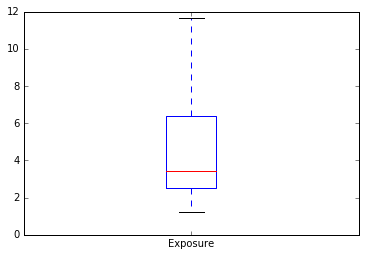

In [9]:
df['Exposure'].plot.box()

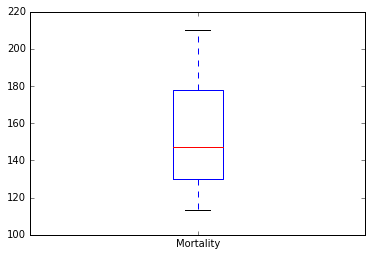

In [13]:
df['Mortality'].plot.box()

## 4. Find a reasonable threshold to say exposure is high and recode the data 

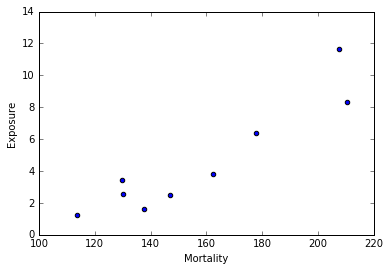

In [15]:
df.plot.scatter(x='Mortality', y='Exposure')

In [24]:
df['mortality_limit'] = df['Mortality'].apply(lambda x:1 if x>=147.1 else 0)
df['exposure_limit'] = df['Exposure'].apply(lambda x:1 if x>=3.41 else 0)

In [27]:
x = np.asarray(df['mortality_limit'])
y = np.asarray(df['exposure_limit'])

## 5. Create a logistic regression model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lm = LogisticRegression()

In [36]:
lm = lm.fit(x,y)

/Users/paolorivas/.virtualenvs/workshop/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [1 9]

In [33]:
lm.score(x,y)

NotFittedError: This LogisticRegression instance is not fitted yet

## 6. Predict whether the mortality rate (Cancer per 100,000 man years) will be high at an exposure level of 50